Source: https://www.statisticsdonewrong.com/p-value.html

Alex Reinhart's Statistics done Wrong is a great exposition of the numerous errors that can creep into a statistical work. [Chapter *n*](https://www.statisticsdonewrong.com/p-value.html) covers p-values and the base rate fallacy. I'll summarise his point below, but I suggest you visit the shortened e-book using the link above.

- In his example, you are testing a hundred cancer drugs. 10 of these actually work, but you don't know which ones - hence the tests!
- Using an alpha value of 0.05 and a beta value of 0.2. This means that:
    - Of the 10 drugs that work, I'll correctly detect 8 of them.
    - Of the 90 drugs that don't work, I'll incorrectly conclude that aroud 5 have significant effects. This is because at an alplha level of 0.05, we can anticipate 90 * 0.05 ~ 5 FPs
- So having performed my experiments, I conclude that there are 13 working drugs: 8 which do indeed work and 5 which don't. Of these 13 drugs, only 8/13 or 62% are truly effective. In other words, the false discovery rate is 38%.
- This means that if I go ahead and test one randomly selected drug out of the 100, even if the subsequent statistical test yields a p-value < 0.05, there is still only a 62% chance that the drug is effective. In short, the p-value doesn't tell you anything about how effective your medication is. If the base rate is low, then most statistically significant results will be duds.


The FDR is a function of the base rate. Let's use the example above that we got from Alex Reinhart's book. Imagine we test 100 drugs. We will see how our FDR varies as a function of the base rate.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
n = 100
alpha = 0.05
power = 0.8

df = pd.DataFrame(columns=['Drugs'], 
                  data=np.arange(0,n+1))
df['Base Rate'] = df['Drugs'] * 100 / n
df['Correct'] = df['Drugs'] * 0.8
df['Incorrect'] = (n - df['Correct']) * alpha
df['FDR'] = df['Incorrect'] * 100 / (df['Correct'] + df['Incorrect'])
df.set_index('Base Rate', inplace=True)

Text(0.5,1,'False Discovery Rate as a function of Base Rate')

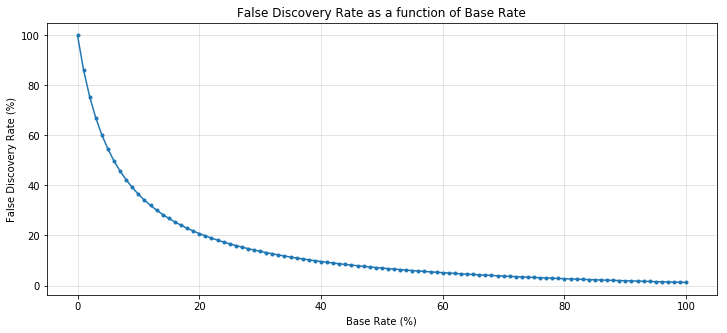

In [10]:
df['FDR'].plot(style='.-', figsize=(12,5))
plt.grid(True, alpha=0.4)
plt.ylabel('False Discovery Rate (%)')
plt.xlabel('Base Rate (%)')
plt.title('False Discovery Rate as a function of Base Rate')

The false discovery rate varies as a function of the base rate. If the base rate ie the number of medications that are truly effective is low, then our false discovery rate will be high - most of our discoveries are false positives. But as the base rate increases, the false discovery rate decreases.

#### Applications to Experimentation

Consider the question of quantifying the overall benefit of a product optimisation program. An obvious approach to this problem is to sum the conversion uplift obtained from each successful test (for small percentages, summing each percentage is almost equivalent to multiplying the conversion uplifts of experiments performed in series). But this method can lead to inaccurate estimates of the total benefit of a testing program (when measured against a holdout set). This can be for several reasons:

- Some tests will be false discoveries and have no true uplift.
- A/B tests measure the short term impact of a feature change - all of these short-term effects may not be an accurate estimate of the long-term effect of feature changes.
- Seasonal effects: it may be that the effect of a feature change varies over time.

Let's consider the first point. We saw that our false discovery rate is not equal to the false positive rate.